# TITANIC 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os 
import re

In [5]:
PATH_DATA = os.path.join("datasets", "titanic")

def load_data(filename, path_data=PATH_DATA):
    path_load = os.path.join(path_data, filename)
    return pd.read_csv(path_load)

In [104]:
train_data = load_data("train.csv")
test_data = load_data("test.csv")

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

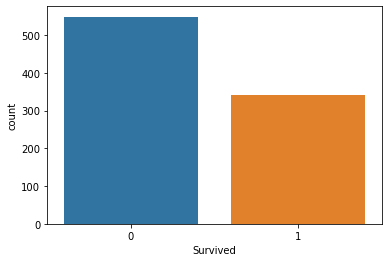

In [11]:
sns.countplot(x="Survived", data=train_data)

In [33]:
train_data.set_index("PassengerId", inplace = True, drop=True)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

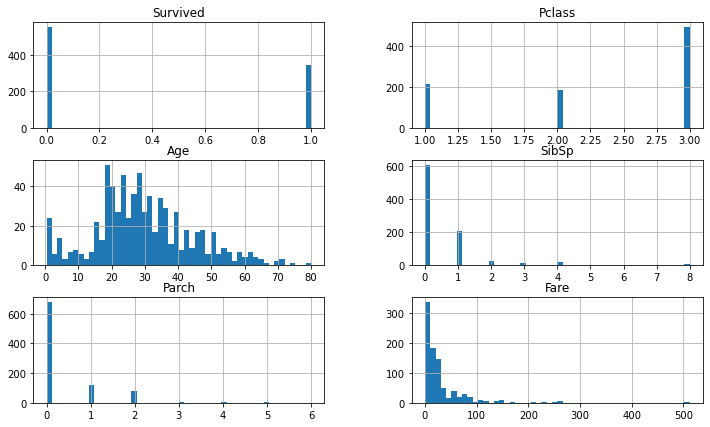

In [34]:
train_data.hist(bins=50, figsize=(12,7))

In [35]:
corr_matrix = train_data.corr()

In [36]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [39]:
titanic = train_data.drop("Survived", axis=1)
titanic_labels = train_data["Survived"].copy()

In [40]:
titanic.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [62]:
titanic["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
D21            1
B82 B84        1
C104           1
B80            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

In [64]:
titanic["Cabin"].iloc[1][0]

'C'

In [41]:
list(titanic)

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [43]:
titanic["Name"].dtype == "O"

True

In [44]:
num_list = list()
cat_list = list()

for col in list(titanic):
    if titanic[col].dtype == "O":
        cat_list.append(col)
    else:
        num_list.append(col)

In [45]:
num_list

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
titanic_num = titanic[num_list]
titanic_cat = titanic[cat_list]

In [47]:
titanic_cat

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [48]:
titanic_num

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,NaN,1,2,23.4500


Working on **numerical** attributes

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_name, is_num):
        self.attributes_name = attributes_name
        self.is_num = is_num
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.is_num:
            X.set_index("PassengerId", inplace = True, drop=True)
        selectedDataframe = X[self.attributes_name]
        return selectedDataframe

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [86]:
num_pipeline = Pipeline([
    ("select_num", DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'], is_num=True)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

In [89]:
num_pipeline.fit_transform(train_data.copy())

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [90]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Working on the **Categorical** attributes

In [112]:
class AttributesSelectedTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, cat_attributes_selected):
        self.cat_attributes_selected = cat_attributes_selected
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['title'] = X[self.cat_attributes_selected[0]].map(lambda x: x.split(',')[1].split(',')[0])
        X['surname'] = X[self.cat_attributes_selected[0]].map(lambda x: '(' in x)
        X[self.cat_attributes_selected[1]] = X[self.cat_attributes_selected[1]].map(lambda x: x[0] if not pd.isnull(x) else 'Z')
        
        X.drop([self.cat_attributes_selected[0]], axis=1)
        return X

In [69]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] 
                                         for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['Pclass', 'Sex', 'Embarked', 'Name', 'Cabin'], is_num=False)),
    ("cat_transf", AttributesSelectedTransformation(['Name', 'Cabin'])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [105]:
a =train_data.copy()

In [117]:
cat_pipeline.fit_transform(train_data.copy())

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

Building a **full pipeline** using `FeatureUnion()`

In [118]:
from sklearn.pipeline import FeatureUnion

In [119]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [120]:
X_train = full_pipeline.fit_transform(train_data.copy())
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [121]:
X_train.shape

(891, 1717)

In [122]:
y_train = train_data["Survived"]

In [123]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [124]:
y_train.shape

(891,)

**SVM classifier**

In [125]:
from sklearn.svm import SVC

In [126]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.6296379525593008

**Logistic Regression**

In [129]:
lg_clf = LogisticRegression()
lg_clf.fit(X_train, y_train)

LogisticRegression()

In [130]:
lg_scores = cross_val_score(lg_clf, X_train, y_train, cv=10)
lg_scores.mean()

0.8137078651685394

**Random Forest**

In [131]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8272034956304619

let's plot the `boxplot()` of the accuracy score for the 10 scores of the cross-validation of each model

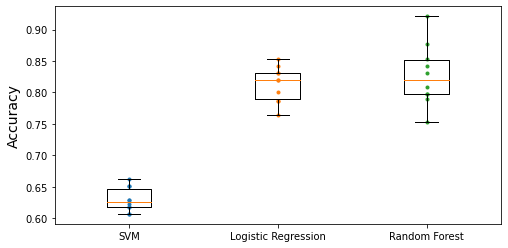

In [133]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, lg_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.boxplot([svm_scores, lg_scores, forest_scores], labels=("SVM", "Logistic Regression", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [ ]:
X_test = full_pipeline.fit_transform(test_data.copy())
y_pred = forest_clf(X_test)

With this `y_pred` we can fill in the test csv file (test.csv) in the column `Survived` and upload it on [Kaggle](https://www.kaggle.com/c/titanic/data).